In [1]:
import pandas as pd

# import csv

In [2]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [3]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

# data exploration

### checking out calendar ID column, comfrim that it represents each day in the data set; date cooresponds to last 4 digits of the ID

In [4]:
wego['CALENDAR_ID'].value_counts().sort_index()

CALENDAR_ID
120230801    6461
120230802    6450
120230803    6472
120230804    6458
120230805    4164
             ... 
120230926    6499
120230927    6508
120230928    6499
120230929    6541
120230930    4158
Name: count, Length: 61, dtype: int64

In [5]:
wego['SERVICE_ABBR'].value_counts().sort_index()

SERVICE_ABBR
1    279300
2     37497
3     33532
Name: count, dtype: int64

In [6]:
wego['BLOCK_ABBR'].value_counts()

BLOCK_ABBR
300     8894
2312    8532
2310    8233
5003    8086
5004    8048
        ... 
5094      72
8405      72
6401      72
5690      72
9975      72
Name: count, Length: 102, dtype: int64

In [7]:
wego['OPERATOR'].value_counts()

OPERATOR
2352    2970
1266    2911
1147    2710
1133    2625
2424    2577
        ... 
2256       6
56         3
473        2
0          1
656        1
Name: count, Length: 341, dtype: int64

# Q1

### What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like?

##### create an adherence data frame

In [8]:
adherence = wego[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]

adherence

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
350324,0,1,0
350325,0,1,0
350326,0,0,1
350327,0,1,0


In [9]:
adherence[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']].describe()

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
count,350329.000000,350329.000000,350329.000000
mean,0.027902,0.168522,0.770841
std,0.164693,0.374329,0.420292
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


In [10]:
adherence['ADJUSTED_EARLY_COUNT'].value_counts()

ADJUSTED_EARLY_COUNT
0    340554
1      9775
Name: count, dtype: int64

In [11]:
adherence['ADJUSTED_LATE_COUNT'].value_counts()

ADJUSTED_LATE_COUNT
0    291291
1     59038
Name: count, dtype: int64

In [12]:
adherence['ADJUSTED_ONTIME_COUNT'].value_counts()

ADJUSTED_ONTIME_COUNT
1    270048
0     80281
Name: count, dtype: int64

looking at value counts of each column above, we can see that it is counting both 1, where adherence was not met, and the 0 values where it was

In [13]:
adherence.sum(axis =0, skipna = True).reset_index(name='sum_not_in_adherence')

,index,sum_not_in_adherence
0,ADJUSTED_EARLY_COUNT,9775
1,ADJUSTED_LATE_COUNT,59038
2,ADJUSTED_ONTIME_COUNT,270048


##### Percentage of adherence on time

In [14]:
adherence['ADJUSTED_ONTIME_COUNT'].sum()/350329 * 100

77.08411236295025

In [15]:
wego['HDWY_DEV'].describe()

count    265893.000000
mean          0.518081
std           7.161798
min         -64.000000
25%          -2.316667
50%           0.033333
75%           2.483333
max         565.433333
Name: HDWY_DEV, dtype: float64

#### import numpy to create visuals representations of distributions for adherence and headway deviation

In [16]:
import numpy as np

#### visual represenation of distribution fro adherence

In [17]:
ad_mean = wego['ADHERENCE'].mean()
ad_std = np.std(wego['ADHERENCE'])

[Text(0.5, 1.0, 'Adherence Distribution Excluding Outliers'),
 Text(0.5, 0, 'Adherence')]

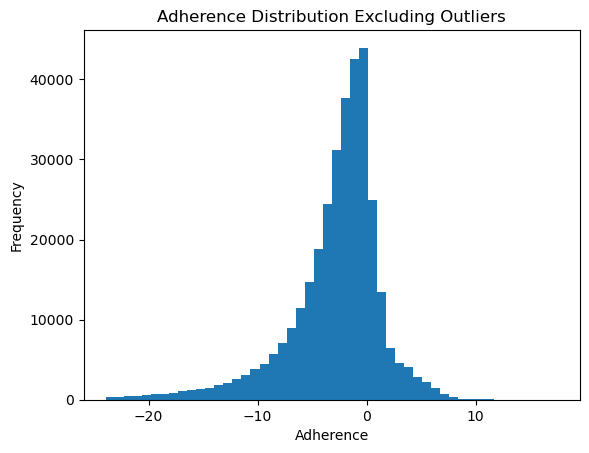

In [18]:
ax = (
    wego[wego['ADHERENCE'].between(ad_mean - ad_std*3,
                                   ad_mean + ad_std*3,
                                   inclusive='both')]
    ['ADHERENCE']
    .plot(kind='hist',
          bins=50)
)
ax.set(
    title='Adherence Distribution Excluding Outliers',
    xlabel='Adherence'
    )

##### visual represenation of distribution of headway deviation

In [19]:
hd_mean = wego['HDWY_DEV'].mean()
hd_std = np.std(wego['HDWY_DEV'])

[Text(0.5, 1.0, 'Headway Deviation Distribution Excluding Outliers'),
 Text(0.5, 0, 'Headway Deviation')]

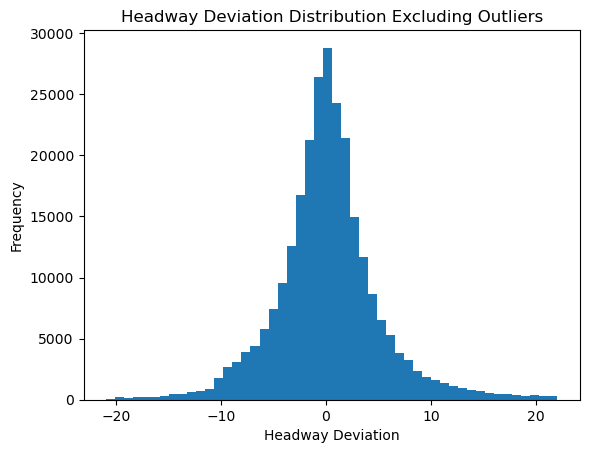

In [20]:
ax = (
    wego[wego['HDWY_DEV'].between(hd_mean - hd_std*3,
                                   hd_mean + hd_std*3,
                                   inclusive='both')]
    ['HDWY_DEV']
    .plot(kind='hist',
          bins=50)
)
ax.set(
    title='Headway Deviation Distribution Excluding Outliers',
    xlabel='Headway Deviation'
    )

In [21]:
#calculating headway deviation percentage 
wego['HDWY_DEV_PERC'] = wego['HDWY_DEV']/wego['SCHEDULED_HDWY']

In [22]:
wego['HDWY_DEV_PERC']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
350324    0.175556
350325         NaN
350326    0.062222
350327    0.583333
350328         NaN
Name: HDWY_DEV_PERC, Length: 350329, dtype: float64

In [23]:
#creating columns based on meeting criteria for acceptable headway
wego['BUNCHING'] = wego['HDWY_DEV_PERC'] < -0.5
wego['GAPPING'] = wego['HDWY_DEV_PERC'] > 0.5
wego['ACCEPTED'] = (wego['HDWY_DEV_PERC'] >= -0.5) & (wego['HDWY_DEV_PERC'] <= 0.5)

In [24]:
wego[['BUNCHING','GAPPING', 'ACCEPTED', 'HDWY_DEV_PERC']]

,BUNCHING,GAPPING,ACCEPTED,HDWY_DEV_PERC
0,False,False,False,NaN
1,False,False,False,NaN
2,False,False,False,NaN
3,False,False,False,NaN
4,False,False,False,NaN
...,...,...,...,...
350324,False,False,True,0.175556
350325,False,False,False,NaN
350326,False,False,True,0.062222
350327,False,True,False,0.583333


In [25]:
# headway acceptance dataframe WITHOUT Na values

hdwy_conform = wego[['HDWY_DEV','SCHEDULED_HDWY','HDWY_DEV_PERC','BUNCHING','GAPPING', 'ACCEPTED']].dropna()
                    
hdwy_conform

,HDWY_DEV,SCHEDULED_HDWY,HDWY_DEV_PERC,BUNCHING,GAPPING,ACCEPTED
7,2.666666,35.0,0.076190,False,False,True
8,1.966666,35.0,0.056190,False,False,True
9,-0.483334,15.0,-0.032222,False,False,True
11,-2.166667,15.0,-0.144444,False,False,True
12,-3.883334,15.0,-0.258889,False,False,True
...,...,...,...,...,...,...
350320,6.716666,30.0,0.223889,False,False,True
350323,4.916666,30.0,0.163889,False,False,True
350324,5.266666,30.0,0.175556,False,False,True
350326,1.866666,30.0,0.062222,False,False,True


# Q2

### How does direction of travel, route, or location affect the headway and on-time performance?

In [26]:
import seaborn as sns

In [27]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

###### investigation of direction of travel with adherence

In [28]:
wego[['ROUTE_DIRECTION_NAME','ADHERENCE']]

,ROUTE_DIRECTION_NAME,ADHERENCE
0,TO DOWNTOWN,-2.133333
1,TO DOWNTOWN,-2.450000
2,TO DOWNTOWN,-0.933333
3,TO DOWNTOWN,6.283333
4,FROM DOWNTOWN,-1.583333
...,...,...
350324,TO DOWNTOWN,-8.433333
350325,TO DOWNTOWN,-11.300000
350326,FROM DOWNTOWN,-4.316666
350327,FROM DOWNTOWN,-22.083333


In [29]:
#function to call wego data based on direction

def direction(x):
    
    return wego[wego['ROUTE_DIRECTION_NAME']==x]

In [30]:
to_dt = direction('TO DOWNTOWN')

In [31]:
#data frame for trips only moving towards downtown

to_dt

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PERC,BUNCHING,GAPPING,ACCEPTED
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,0.0,0,6.500000,NaN,NaN,False,False,False
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,NaN,False,False,False
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,NaN,False,False,False
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,NaN,0,0.000000,NaN,NaN,False,False,False
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1,0,0.0,0,13.216666,10.0,0.076190,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350318,120230930,2,100406604,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,0.127381,False,False,True
350319,120230930,2,100406605,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,...,0,0,NaN,0,NaN,NaN,NaN,False,False,False
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,0,0.0,0,1.966666,5.0,0.163889,False,False,True
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,0.175556,False,False,True


In [32]:
#pulling only the adherence values from the to downtown dataframe
to_dt_adherence = to_dt[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]

In [33]:
to_dt_adherence

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
7,0,0,1
...,...,...,...
350318,0,1,0
350319,0,0,0
350323,0,1,0
350324,0,1,0


In [121]:
#comparison on each adherence valuation for the to downtown data frame

to_dt_adherencedf = to_dt_adherence.sum(axis =0, skipna = True).reset_index(name='SUM PER ADHERENCE VALUATION')

to_dt_adherencedf

,index,SUM PER ADHERENCE VALUATION
0,ADJUSTED_EARLY_COUNT,4484
1,ADJUSTED_LATE_COUNT,19437
2,ADJUSTED_ONTIME_COUNT,135634


In [141]:
#to_dt_adherencedf.rename(columns = {'index': 'Adherence Value'}, inplace = True)

In [142]:
to_dt_adherencedf["Adherence Value"] = to_dt_adherencedf["Adherence Value"].str.replace('_', ' ')



[Text(0, 0, 'ADJUSTED_EARLY_COUNT'),
 Text(1, 0, 'ADJUSTED_LATE_COUNT'),
 Text(2, 0, 'ADJUSTED_ONTIME_COUNT')]

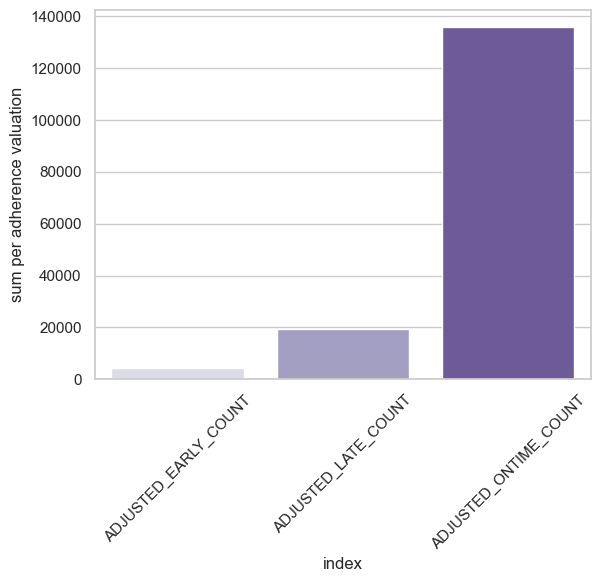

In [83]:
# table above plotted
to_dt_adherence_plt = sns.barplot(x = 'index',
            y = 'sum per adherence valuation',
            data = to_dt_adherencedf,
            palette = "Purples")

to_dt_adherence_plt.set_xticklabels(r23plot.get_xticklabels(), rotation=45)

In [36]:
##data frame for trips only moving away from downtown

away_dt = direction('FROM DOWNTOWN')

In [37]:
away_dt

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PERC,BUNCHING,GAPPING,ACCEPTED
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,1,0,0.0,0,12.866666,5.0,NaN,False,False,False
5,120230801,1,99457895,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,NaN,False,False,False
6,120230801,1,99457896,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,1,0,NaN,0,0.000000,NaN,NaN,False,False,False
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,1,0,0.0,0,10.800000,5.0,-0.144444,False,False,True
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,-0.258889,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350321,120230930,2,100406607,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,...,0,0,0.0,0,NaN,NaN,NaN,False,False,False
350322,120230930,2,100406608,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,...,0,0,NaN,0,0.000000,NaN,NaN,False,False,False
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,0.062222,False,False,True
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,0.583333,False,True,False


In [38]:
#pulling only the adherence values from the away from downtown dataframe
away_dt_adherence = away_dt[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]

In [39]:
away_dt_adherence

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
4,0,0,1
5,0,0,1
6,0,0,1
11,0,0,1
12,1,0,0
...,...,...,...
350321,0,0,0
350322,0,1,0
350326,0,0,1
350327,0,1,0


In [131]:
#comparison on each adherence valuation for the away from downtown data frame

away_dt_adherencedf = away_dt_adherence.sum(axis =0, skipna = True).reset_index(name='SUM PER ADHERENCE VALUATION')

away_dt_adherencedf

,index,SUM PER ADHERENCE VALUATION
0,ADJUSTED_EARLY_COUNT,5291
1,ADJUSTED_LATE_COUNT,39601
2,ADJUSTED_ONTIME_COUNT,134414


In [132]:
#away_dt_adherencedf.rename(columns = {'index': 'Adherence Value'}, inplace = True)

In [139]:
away_dt_adherencedf["Adherence Value"] = away_dt_adherencedf["Adherence Value"].str.replace('_', ' ')



[Text(0, 0, 'ADJUSTED_EARLY_COUNT'),
 Text(1, 0, 'ADJUSTED_LATE_COUNT'),
 Text(2, 0, 'ADJUSTED_ONTIME_COUNT')]

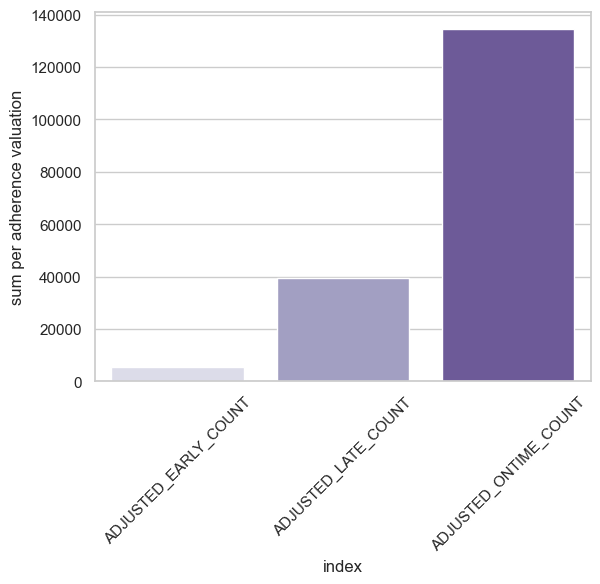

In [86]:
# table above plotted
away_dt_adherence_plt = sns.barplot(x = 'index',
            y = 'sum per adherence valuation',
            data = away_dt_adherencedf,
            palette = "Purples")

away_dt_adherence_plt.set_xticklabels(r23plot.get_xticklabels(), rotation=45)

In [126]:
import matplotlib.pyplot as plt

[Text(0, 0, 'ADJUSTED EARLY COUNT'),
 Text(1, 0, 'ADJUSTED LATE COUNT'),
 Text(2, 0, 'ADJUSTED ONTIME COUNT')]

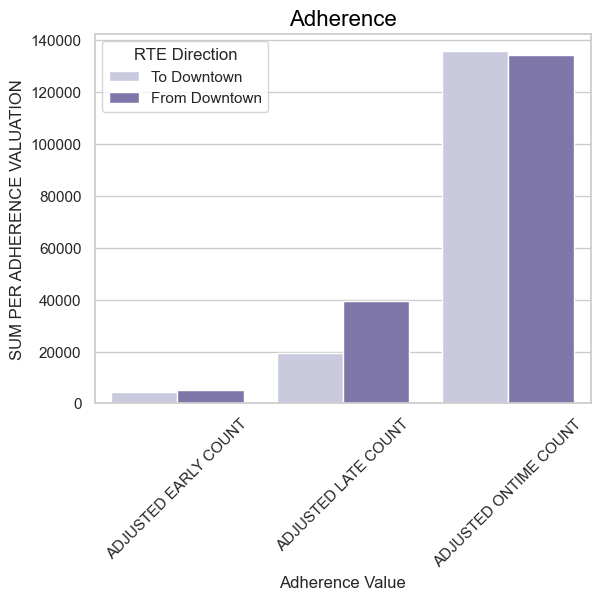

In [143]:
# add column to each data frame identfiying as to or away from downtown
to_dt_adherencedf['RTE Direction'] = 'To Downtown'
away_dt_adherencedf['RTE Direction'] = 'From Downtown'

#concat the data frames together
direction_adherence = pd.concat([to_dt_adherencedf , away_dt_adherencedf])

#plot both into a barplot
direction_adherence_plt = sns.barplot(x='Adherence Value', y='SUM PER ADHERENCE VALUATION', hue='RTE Direction', data=direction_adherence, palette = "Purples")
plt.title("Adherence",fontsize=16,color="black")


direction_adherence_plt.set_xticklabels(direction_adherence_plt.get_xticklabels(), rotation=45)

In [ ]:
away_dt_adherencedf

##### investigation of route with adherence

In [41]:
wego['ROUTE_ABBR'].value_counts()

ROUTE_ABBR
55    61944
56    60020
52    51819
3     47162
50    43291
23    42108
22    25959
7     18026
Name: count, dtype: int64

In [42]:
#function to call wego data based on route

def route(x):
    
    return wego[wego['ROUTE_ABBR']==x]

In [43]:
r55 = route(55)

r55

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PERC,BUNCHING,GAPPING,ACCEPTED
3853,120230801,1,99462915,2023-08-01,55,5500,1206,347480,0,TO DOWNTOWN,...,1,0,0.0,0,9.483333,NaN,NaN,False,False,False
3854,120230801,1,99462916,2023-08-01,55,5500,1206,347480,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,NaN,False,False,False
3855,120230801,1,99462917,2023-08-01,55,5500,1206,347480,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,NaN,False,False,False
3856,120230801,1,99462918,2023-08-01,55,5500,1206,347480,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,NaN,False,False,False
3857,120230801,1,99462919,2023-08-01,55,5500,1206,347480,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349481,120230930,2,100405549,2023-09-30,55,5508,3098,352674,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,0.177778,False,False,True
349482,120230930,2,100405550,2023-09-30,55,5508,3098,352674,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,0.120000,False,False,True
349483,120230930,2,100405551,2023-09-30,55,5508,3098,352674,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,0.237778,False,False,True
349484,120230930,2,100405552,2023-09-30,55,5508,3098,352674,0,FROM DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,0.516667,False,True,False


In [44]:
#pulling only the adherence values from route55 dataframe
r55_adherence = r55[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]

r55_adherence

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
3853,0,0,1
3854,0,0,1
3855,0,0,1
3856,0,0,1
3857,0,0,1
...,...,...,...
349481,0,0,1
349482,0,0,1
349483,0,0,1
349484,0,1,0


In [45]:
#comparison on each adherence valuation for rout 55 data frame

r55_adherence.sum(axis =0, skipna = True).reset_index(name='sum per adherence valuation')

,index,sum per adherence valuation
0,ADJUSTED_EARLY_COUNT,1531
1,ADJUSTED_LATE_COUNT,16748
2,ADJUSTED_ONTIME_COUNT,42080


In [46]:
r56 = route(56)

r56

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PERC,BUNCHING,GAPPING,ACCEPTED
4999,120230801,1,99464095,2023-08-01,56,5600,2374,347902,0,TO DOWNTOWN,...,1,0,0.0,0,46.866666,NaN,NaN,False,False,False
5000,120230801,1,99464096,2023-08-01,56,5600,2374,347902,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,NaN,False,False,False
5001,120230801,1,99464097,2023-08-01,56,5600,2374,347902,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,NaN,False,False,False
5002,120230801,1,99464098,2023-08-01,56,5600,2374,347902,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,NaN,False,False,False
5003,120230801,1,99464099,2023-08-01,56,5600,2374,347902,0,TO DOWNTOWN,...,1,0,NaN,0,0.000000,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350105,120230930,2,100406185,2023-09-30,56,5605,3013,353016,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,-0.083333,False,False,True
350106,120230930,2,100406186,2023-09-30,56,5605,3013,353016,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,-0.055833,False,False,True
350107,120230930,2,100406187,2023-09-30,56,5605,3013,353016,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,-0.025000,False,False,True
350108,120230930,2,100406188,2023-09-30,56,5605,3013,353016,0,FROM DOWNTOWN,...,1,0,0.0,0,1.950000,NaN,-0.033333,False,False,True


In [47]:
#pulling only the adherence values from route56 dataframe
r56_adherence = r56[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]

r56_adherence

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
4999,0,0,1
5000,0,0,1
5001,0,0,1
5002,0,0,1
5003,0,0,1
...,...,...,...
350105,0,0,1
350106,0,0,1
350107,0,0,1
350108,0,0,1


In [48]:
#comparison on each adherence valuation for route 56 data frame

r56_adherence.sum(axis =0, skipna = True).reset_index(name='sum per adherence valuation')

,index,sum per adherence valuation
0,ADJUSTED_EARLY_COUNT,1752
1,ADJUSTED_LATE_COUNT,8837
2,ADJUSTED_ONTIME_COUNT,48361


In [49]:
r52 = route(52)

r52

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PERC,BUNCHING,GAPPING,ACCEPTED
2900,120230801,1,99461930,2023-08-01,52,5200,2112,347114,0,TO DOWNTOWN,...,1,0,0.0,0,35.433333,NaN,NaN,False,False,False
2901,120230801,1,99461931,2023-08-01,52,5200,2112,347114,0,TO DOWNTOWN,...,1,0,0.0,0,2.633333,NaN,NaN,False,False,False
2902,120230801,1,99461932,2023-08-01,52,5200,2112,347114,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,NaN,False,False,False
2903,120230801,1,99461933,2023-08-01,52,5200,2112,347114,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,NaN,False,False,False
2904,120230801,1,99461934,2023-08-01,52,5200,2112,347114,0,TO DOWNTOWN,...,1,0,NaN,0,0.000000,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348701,120230930,2,100404751,2023-09-30,52,5212,3101,352236,0,FROM DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,-0.128161,False,False,True
348702,120230930,2,100404752,2023-09-30,52,5212,3101,352236,0,FROM DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,-0.161494,False,False,True
348703,120230930,2,100404753,2023-09-30,52,5212,3101,352236,0,FROM DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,-0.187356,False,False,True
348704,120230930,2,100404754,2023-09-30,52,5212,3101,352236,0,FROM DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,-0.142593,False,False,True


In [50]:
#pulling only the adherence values from route52 dataframe
r52_adherence = r52[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]

r52_adherence

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
2900,0,0,1
2901,0,0,1
2902,0,0,1
2903,0,0,1
2904,0,0,1
...,...,...,...
348701,0,1,0
348702,0,1,0
348703,0,1,0
348704,0,1,0


In [51]:
#comparison on each adherence valuation for route 52 data frame

r52_adherence.sum(axis =0, skipna = True).reset_index(name='sum per adherence valuation')

,index,sum per adherence valuation
0,ADJUSTED_EARLY_COUNT,1553
1,ADJUSTED_LATE_COUNT,10038
2,ADJUSTED_ONTIME_COUNT,37736


In [52]:
r3 = route(3)

r3

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PERC,BUNCHING,GAPPING,ACCEPTED
1272,120230801,1,99459625,2023-08-01,3,300,2529,346048,0,TO DOWNTOWN,...,1,0,0.0,0,8.433333,NaN,NaN,False,False,False
1273,120230801,1,99459626,2023-08-01,3,300,2529,346048,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,NaN,False,False,False
1274,120230801,1,99459627,2023-08-01,3,300,2529,346048,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,NaN,False,False,False
1275,120230801,1,99459628,2023-08-01,3,300,2529,346048,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,NaN,False,False,False
1276,120230801,1,99459629,2023-08-01,3,300,2529,346048,0,TO DOWNTOWN,...,1,0,NaN,0,0.000000,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347535,120230930,2,100403107,2023-09-30,3,312,2001,351176,0,FROM DOWNTOWN,...,1,0,0.0,0,6.566666,7.0,-0.156667,False,False,True
347536,120230930,2,100403108,2023-09-30,3,312,2001,351176,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,0.552222,False,True,False
347537,120230930,2,100403109,2023-09-30,3,312,2001,351176,0,FROM DOWNTOWN,...,1,0,0.0,0,1.833333,NaN,0.525000,False,True,False
347538,120230930,2,100403110,2023-09-30,3,312,2001,351176,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,0.498333,False,False,True


In [53]:
#pulling only the adherence values from route3 dataframe
r3_adherence = r3[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]

r3_adherence.head()

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
1272,0,0,1
1273,0,0,1
1274,0,0,1
1275,0,0,1
1276,0,0,1


In [54]:
#comparison on each adherence valuation for route 3 data frame

r3comp = r3_adherence.sum(axis =0, skipna = True).reset_index(name='sum per adherence valuation')

r3comp

,index,sum per adherence valuation
0,ADJUSTED_EARLY_COUNT,1382
1,ADJUSTED_LATE_COUNT,9590
2,ADJUSTED_ONTIME_COUNT,34516


[Text(0, 0, 'ADJUSTED_EARLY_COUNT'),
 Text(1, 0, 'ADJUSTED_LATE_COUNT'),
 Text(2, 0, 'ADJUSTED_ONTIME_COUNT')]

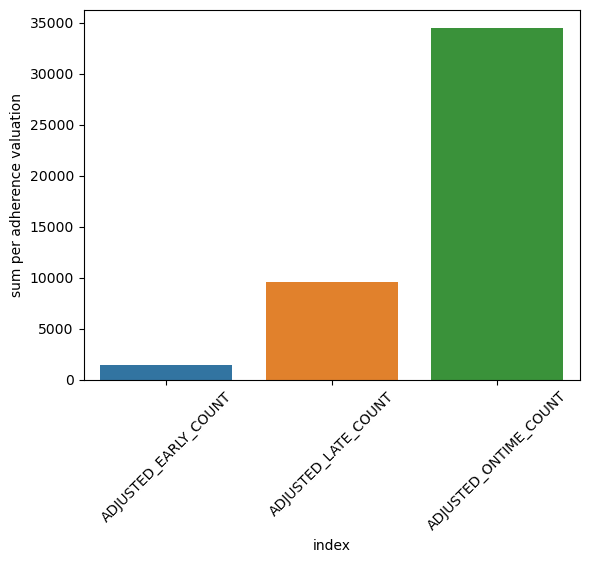

In [55]:
#create barplot
r3plot = sns.barplot(r3comp, x="index", y="sum per adherence valuation")

#rotate labels
r3plot.set_xticklabels(r3plot.get_xticklabels(), rotation=45)

In [56]:
r50 = route(50)

r50

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PERC,BUNCHING,GAPPING,ACCEPTED
2126,120230801,1,99461142,2023-08-01,50,5000,1682,346804,0,TO DOWNTOWN,...,1,0,0.0,0,17.483333,NaN,NaN,False,False,False
2127,120230801,1,99461143,2023-08-01,50,5000,1682,346804,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,NaN,False,False,False
2128,120230801,1,99461144,2023-08-01,50,5000,1682,346804,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,NaN,False,False,False
2129,120230801,1,99461145,2023-08-01,50,5000,1682,346804,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,NaN,False,False,False
2130,120230801,1,99461146,2023-08-01,50,5000,1682,346804,0,TO DOWNTOWN,...,1,0,0.0,0,2.016666,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348087,120230930,2,100404125,2023-09-30,50,5004,1673,351904,0,FROM DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,0.326667,False,False,True
348088,120230930,2,100404126,2023-09-30,50,5004,1673,351904,0,FROM DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,0.283889,False,False,True
348089,120230930,2,100404127,2023-09-30,50,5004,1673,351904,0,FROM DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,0.266111,False,False,True
348090,120230930,2,100404128,2023-09-30,50,5004,1673,351904,0,FROM DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,0.245000,False,False,True


In [57]:
#pulling only the adherence values from route50 dataframe
r50_adherence = r50[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]

r50_adherence.head()

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
2126,0,0,1
2127,0,0,1
2128,0,0,1
2129,0,0,1
2130,0,0,1


In [58]:
#comparison on each adherence valuation for route 50 data frame

r50comp = r50_adherence.sum(axis =0, skipna = True).reset_index(name='sum per adherence valuation')

r50comp

,index,sum per adherence valuation
0,ADJUSTED_EARLY_COUNT,1207
1,ADJUSTED_LATE_COUNT,5113
2,ADJUSTED_ONTIME_COUNT,36309


[Text(0, 0, 'ADJUSTED_EARLY_COUNT'),
 Text(1, 0, 'ADJUSTED_LATE_COUNT'),
 Text(2, 0, 'ADJUSTED_ONTIME_COUNT')]

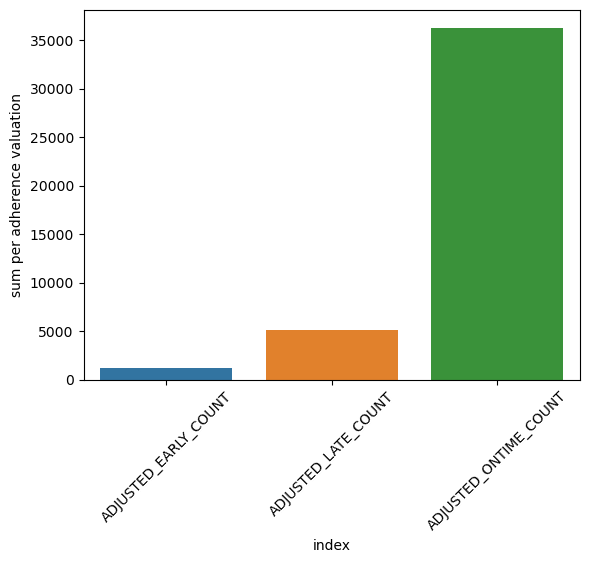

In [59]:
#create barplot
r50plot = sns.barplot(r50comp, x="index", y="sum per adherence valuation")

#rotate labels
r50plot.set_xticklabels(r50plot.get_xticklabels(), rotation=45)

In [60]:
r23 = route(23)

r23

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PERC,BUNCHING,GAPPING,ACCEPTED
491,120230801,1,99458391,2023-08-01,23,2300,1893,345435,0,FROM DOWNTOWN,...,1,0,0.0,0,12.983333,NaN,0.196667,False,False,True
492,120230801,1,99458392,2023-08-01,23,2300,1893,345435,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,0.030000,False,False,True
493,120230801,1,99458393,2023-08-01,23,2300,1893,345435,0,FROM DOWNTOWN,...,1,0,NaN,0,0.000000,NaN,NaN,False,False,False
494,120230801,1,99458394,2023-08-01,23,2300,1893,345436,0,TO DOWNTOWN,...,0,0,0.0,0,14.433333,7.0,0.174242,False,False,True
495,120230801,1,99458395,2023-08-01,23,2300,1893,345436,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,0.043939,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346952,120230930,2,100402198,2023-09-30,23,2313,1379,350588,0,FROM DOWNTOWN,...,1,1,1.0,0,0.000000,NaN,0.905333,False,True,False
346953,120230930,2,100402199,2023-09-30,23,2313,1379,350588,0,FROM DOWNTOWN,...,1,0,NaN,0,0.000000,NaN,NaN,False,False,False
346954,120230930,2,100402200,2023-09-30,23,2313,1379,350588,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,0.050667,False,False,True
346955,120230930,2,100402201,2023-09-30,23,2313,1379,350588,0,FROM DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,0.047333,False,False,True


In [61]:
#pulling only the adherence values from route23 dataframe
r23_adherence = r23[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]

r23_adherence.head()

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
491,0,0,1
492,0,0,1
493,0,0,1
494,0,1,0
495,0,0,1


In [62]:
#comparison on each adherence valuation for route 23 data frame

r23comp = r23_adherence.sum(axis =0, skipna = True).reset_index(name='sum per adherence valuation')

r23comp

,index,sum per adherence valuation
0,ADJUSTED_EARLY_COUNT,1286
1,ADJUSTED_LATE_COUNT,3230
2,ADJUSTED_ONTIME_COUNT,35137


[Text(0, 0, 'ADJUSTED_EARLY_COUNT'),
 Text(1, 0, 'ADJUSTED_LATE_COUNT'),
 Text(2, 0, 'ADJUSTED_ONTIME_COUNT')]

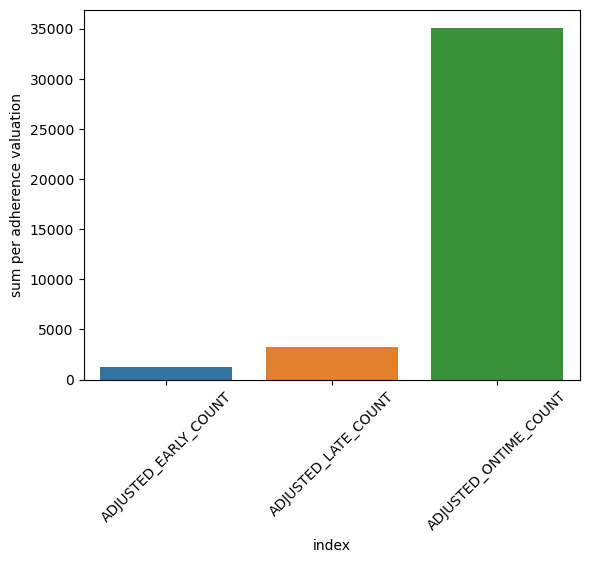

In [63]:
#create barplot
r23plot = sns.barplot(r23comp, x="index", y="sum per adherence valuation")

#rotate labels
r23plot.set_xticklabels(r23plot.get_xticklabels(), rotation=45)

In [64]:
r22 = route(22)

r22

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PERC,BUNCHING,GAPPING,ACCEPTED
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,0.0,0,6.500000,NaN,NaN,False,False,False
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,NaN,False,False,False
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,NaN,False,False,False
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,NaN,0,0.000000,NaN,NaN,False,False,False
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,1,0,0.0,0,12.866666,5.0,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346467,120230930,2,100401705,2023-09-30,22,2202,2832,350176,0,FROM DOWNTOWN,...,1,0,0.0,0,3.666666,3.0,-0.205556,False,False,True
346468,120230930,2,100401706,2023-09-30,22,2202,2832,350176,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,-0.393333,False,False,True
346469,120230930,2,100401707,2023-09-30,22,2202,2832,350176,0,FROM DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,-0.406667,False,False,True
346470,120230930,2,100401708,2023-09-30,22,2202,2832,350176,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,-0.170000,False,False,True


In [65]:
#pulling only the adherence values from route 22 dataframe
r22_adherence = r22[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]

r22_adherence.head()

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [66]:
#comparison on each adherence valuation for route 22 data frame

r22comp = r22_adherence.sum(axis =0, skipna = True).reset_index(name='sum per adherence valuation')

r22comp

,index,sum per adherence valuation
0,ADJUSTED_EARLY_COUNT,631
1,ADJUSTED_LATE_COUNT,2065
2,ADJUSTED_ONTIME_COUNT,22492


[Text(0, 0, 'ADJUSTED_EARLY_COUNT'),
 Text(1, 0, 'ADJUSTED_LATE_COUNT'),
 Text(2, 0, 'ADJUSTED_ONTIME_COUNT')]

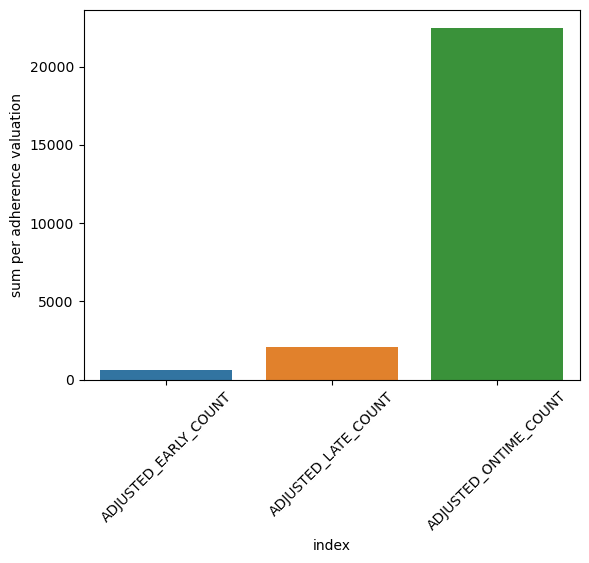

In [67]:
#create barplot
r22plot = sns.barplot(r22comp, x="index", y="sum per adherence valuation")

#rotate labels
r22plot.set_xticklabels(r22plot.get_xticklabels(), rotation=45)

In [68]:
r7 = route(7)

r7

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PERC,BUNCHING,GAPPING,ACCEPTED
2123,120230801,1,99460956,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,-0.923333,True,False,False
2124,120230801,1,99460957,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,-0.603333,True,False,False
2125,120230801,1,99460958,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,...,1,0,NaN,0,0.000000,NaN,NaN,False,False,False
6134,120230801,1,99465615,2023-08-01,7,700,3144,348421,0,FROM DOWNTOWN,...,0,0,0.0,0,NaN,NaN,NaN,False,False,False
6135,120230801,1,99465616,2023-08-01,7,700,3144,348421,0,FROM DOWNTOWN,...,0,0,0.0,0,NaN,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,0.175556,False,False,True
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,0,NaN,0,0.000000,NaN,NaN,False,False,False
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,0.062222,False,False,True
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,0.583333,False,True,False


In [69]:
#pulling only the adherence values from route 7 dataframe
r7_adherence = r7[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]

r7_adherence.head()

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
2123,0,0,1
2124,0,0,1
2125,0,0,1
6134,0,0,0
6135,0,0,0


In [70]:
#comparison on each adherence valuation for route 7 data frame

r7comp = r7_adherence.sum(axis =0, skipna = True).reset_index(name='sum per adherence valuation')

r7comp

,index,sum per adherence valuation
0,ADJUSTED_EARLY_COUNT,433
1,ADJUSTED_LATE_COUNT,3417
2,ADJUSTED_ONTIME_COUNT,13417


[Text(0, 0, 'ADJUSTED_EARLY_COUNT'),
 Text(1, 0, 'ADJUSTED_LATE_COUNT'),
 Text(2, 0, 'ADJUSTED_ONTIME_COUNT')]

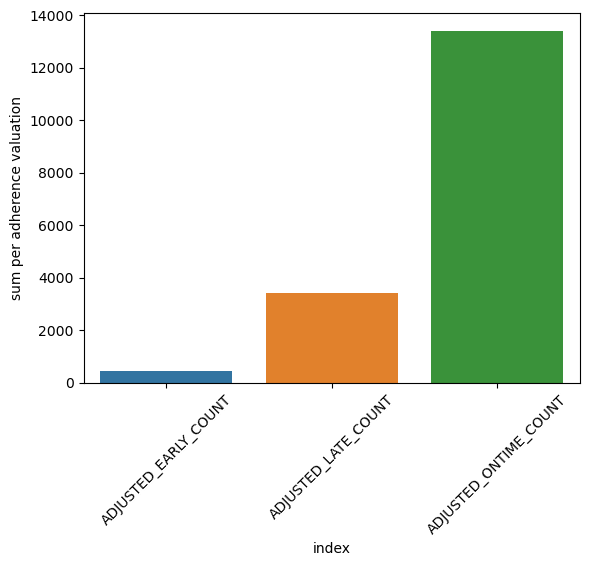

In [71]:
#create barplot
r7plot = sns.barplot(r7comp, x="index", y="sum per adherence valuation")

#rotate labels
r7plot.set_xticklabels(r7plot.get_xticklabels(), rotation=45)


In [72]:
#grouping route, direction. with mean of HDWY DEV and ADHERENCE per each

routedir_headway = wego[["ROUTE_DIRECTION_NAME", "ROUTE_ABBR", "HDWY_DEV", "ADHERENCE"]].groupby(['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME']).mean("HDWY_DEV", "ADHERENCE")

routedir_headway

HDWY_DEV  ADHERENCE
ROUTE_ABBR ROUTE_DIRECTION_NAME                     
3          FROM DOWNTOWN         0.636069  -4.831550
           TO DOWNTOWN           0.525802  -2.689360
7          FROM DOWNTOWN         0.379082  -4.028927
           TO DOWNTOWN           0.293108  -2.599183
22         FROM DOWNTOWN         1.088609  -2.179503
           TO DOWNTOWN           0.808517  -0.041538
23         FROM DOWNTOWN         1.063912  -2.295042
           TO DOWNTOWN           1.038711  -0.959462
50         FROM DOWNTOWN         0.222529  -2.729163
           TO DOWNTOWN           0.202238  -2.282192
52         FROM DOWNTOWN         1.238860  -5.149382
           TO DOWNTOWN           0.690182  -2.723518
55         FROM DOWNTOWN         0.264152  -5.673887
           TO DOWNTOWN           0.257969  -3.989490
56         FROM DOWNTOWN         0.158441  -3.579404
           TO DOWNTOWN           0.135393  -1.484165

In [75]:
routedir_headway['ROUTE_ABBR'] = routedir_headway.index
routedir_headway

HDWY_DEV  ADHERENCE           ROUTE_ABBR
ROUTE_ABBR ROUTE_DIRECTION_NAME                                          
3          FROM DOWNTOWN         0.636069  -4.831550   (3, FROM DOWNTOWN)
           TO DOWNTOWN           0.525802  -2.689360     (3, TO DOWNTOWN)
7          FROM DOWNTOWN         0.379082  -4.028927   (7, FROM DOWNTOWN)
           TO DOWNTOWN           0.293108  -2.599183     (7, TO DOWNTOWN)
22         FROM DOWNTOWN         1.088609  -2.179503  (22, FROM DOWNTOWN)
           TO DOWNTOWN           0.808517  -0.041538    (22, TO DOWNTOWN)
23         FROM DOWNTOWN         1.063912  -2.295042  (23, FROM DOWNTOWN)
           TO DOWNTOWN           1.038711  -0.959462    (23, TO DOWNTOWN)
50         FROM DOWNTOWN         0.222529  -2.729163  (50, FROM DOWNTOWN)
           TO DOWNTOWN           0.202238  -2.282192    (50, TO DOWNTOWN)
52         FROM DOWNTOWN         1.238860  -5.149382  (52, FROM DOWNTOWN)
           TO DOWNTOWN           0.690182  -2.723518    (52, TO DOWNTOWN)
55         FROM DOWNTOWN         0.264152  -5.673887  (55, FROM DOWNTOWN)
           TO DOWNTOWN           0.257969  -3.989490    (55, TO DOWNTOWN)
56         FROM DOWNTOWN         0.158441  -3.579404  (56, FROM DOWNTOWN)
           TO DOWNTOWN           0.135393  -1.484165    (56, TO DOWNTOWN)

C:\Users\Savannah\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


AttributeError: 'NoneType' object has no attribute 'set_title'

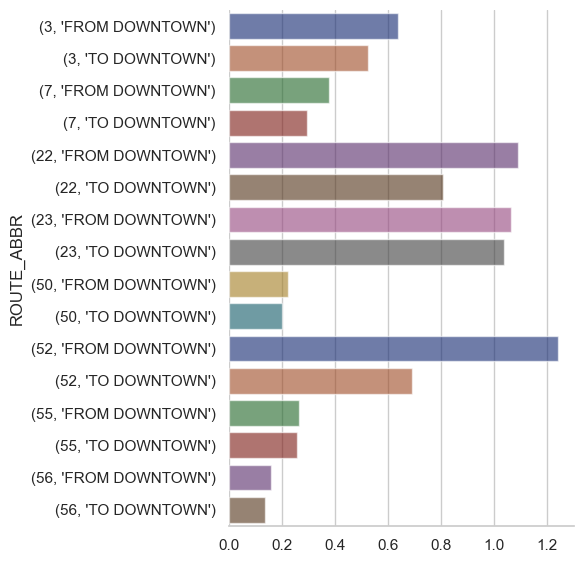

In [74]:
sns.set_theme(style="whitegrid")

#hd_dev = sns.load_dataset('routedir_headway')

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=routedir_headway, kind="bar",
    x="HDWY_DEV", y="ROUTE_ABBR", #hue="ROUTE_DIRECTION_NAME",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "ROUTE_ABBR")
g.legend.set_title("")

NameError: name 'routeplot2' is not defined

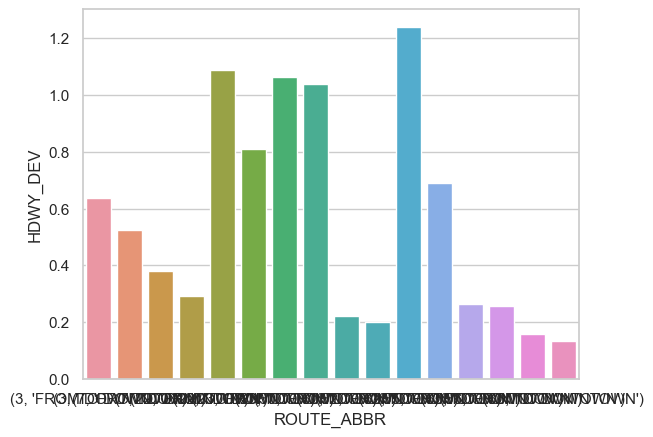

In [76]:
routeplot3 = sns.barplot(routedir_headway, x="ROUTE_ABBR", y="HDWY_DEV")

#rotate labels
routeplot3.set_xticklabels(routeplot2.get_xticklabels(), rotation=45)

[Text(0, 0, "(3, 'FROM DOWNTOWN')"),
 Text(1, 0, "(3, 'TO DOWNTOWN')"),
 Text(2, 0, "(7, 'FROM DOWNTOWN')"),
 Text(3, 0, "(7, 'TO DOWNTOWN')"),
 Text(4, 0, "(22, 'FROM DOWNTOWN')"),
 Text(5, 0, "(22, 'TO DOWNTOWN')"),
 Text(6, 0, "(23, 'FROM DOWNTOWN')"),
 Text(7, 0, "(23, 'TO DOWNTOWN')"),
 Text(8, 0, "(50, 'FROM DOWNTOWN')"),
 Text(9, 0, "(50, 'TO DOWNTOWN')"),
 Text(10, 0, "(52, 'FROM DOWNTOWN')"),
 Text(11, 0, "(52, 'TO DOWNTOWN')"),
 Text(12, 0, "(55, 'FROM DOWNTOWN')"),
 Text(13, 0, "(55, 'TO DOWNTOWN')"),
 Text(14, 0, "(56, 'FROM DOWNTOWN')"),
 Text(15, 0, "(56, 'TO DOWNTOWN')")]

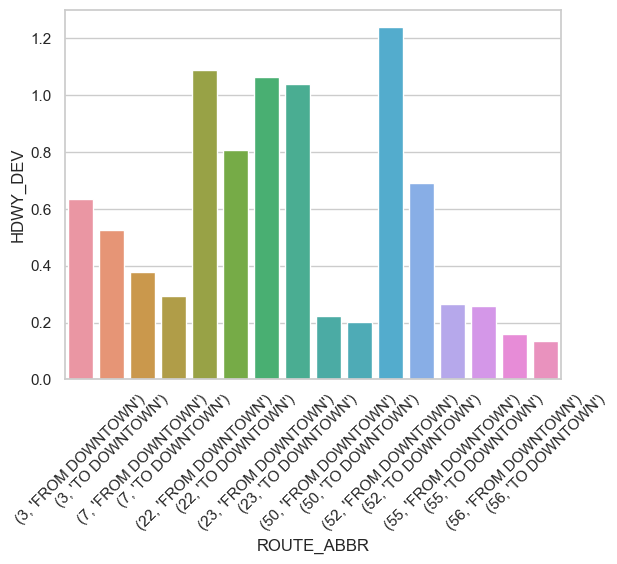

In [77]:
routeplot = sns.barplot(x="ROUTE_ABBR", 
           y="HDWY_DEV", 
          # hue="ROUTE_DIRECTION_NAME", 
           data=routedir_headway) 

#rotate labels
routeplot.set_xticklabels(routeplot.get_xticklabels(), rotation=45)

[Text(0, 0, "(3, 'FROM DOWNTOWN')"),
 Text(1, 0, "(3, 'TO DOWNTOWN')"),
 Text(2, 0, "(7, 'FROM DOWNTOWN')"),
 Text(3, 0, "(7, 'TO DOWNTOWN')"),
 Text(4, 0, "(22, 'FROM DOWNTOWN')"),
 Text(5, 0, "(22, 'TO DOWNTOWN')"),
 Text(6, 0, "(23, 'FROM DOWNTOWN')"),
 Text(7, 0, "(23, 'TO DOWNTOWN')"),
 Text(8, 0, "(50, 'FROM DOWNTOWN')"),
 Text(9, 0, "(50, 'TO DOWNTOWN')"),
 Text(10, 0, "(52, 'FROM DOWNTOWN')"),
 Text(11, 0, "(52, 'TO DOWNTOWN')"),
 Text(12, 0, "(55, 'FROM DOWNTOWN')"),
 Text(13, 0, "(55, 'TO DOWNTOWN')"),
 Text(14, 0, "(56, 'FROM DOWNTOWN')"),
 Text(15, 0, "(56, 'TO DOWNTOWN')")]

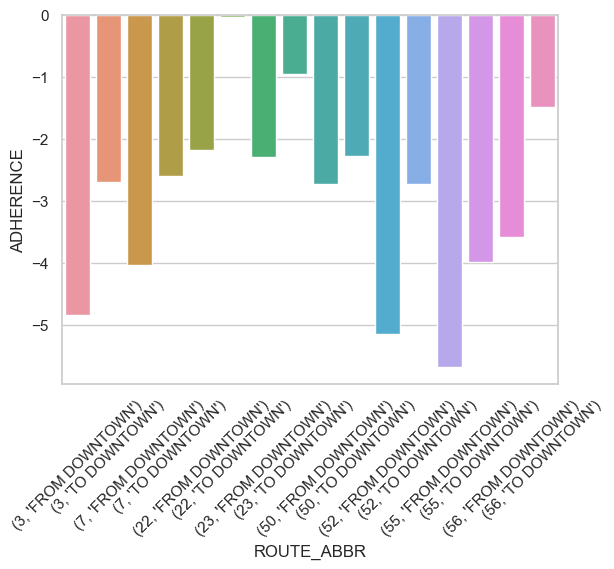

In [78]:
routeplot2 = sns.barplot(x="ROUTE_ABBR", 
           y="ADHERENCE", 
          # hue="ROUTE_DIRECTION_NAME", 
           data=routedir_headway) 

#rotate labels
routeplot2.set_xticklabels(routeplot2.get_xticklabels(), rotation=45)

#### investigation of location with adherence

In [ ]:
wego['TIME_POINT_ABBR'].value_counts()

In [ ]:
loc_adherence = wego[['ADHERENCE','TIME_POINT_ABBR','LATITUDE', 'LONGITUDE']].groupby(['TIME_POINT_ABBR']).mean('ADHERENCE')

loc_adherence

In [ ]:
## this needs serious help


location_adherence = sns.scatterplot(data=loc_adherence, x="ADHERENCE", y="TIME_POINT_ABBR")

##### investigate direction for headway

In [95]:
#pulling only the headway values from the to downtown dataframe
to_dt_hdway = to_dt[['HDWY_DEV', 'BUNCHING', 'GAPPING', 'ACCEPTED']].dropna()

to_dt_hdway

,HDWY_DEV,BUNCHING,GAPPING,ACCEPTED
7,2.666666,False,False,True
8,1.966666,False,False,True
9,-0.483334,False,False,True
14,-0.200000,False,False,True
15,0.083333,False,False,True
...,...,...,...,...
350312,5.516666,False,False,True
350317,-1.933334,False,False,True
350318,3.566666,False,False,True
350323,4.916666,False,False,True


In [111]:
#summation of booleans for each hdway variation for the to downtown directon

to_dt_hdway_comp = to_dt_hdway[['BUNCHING', 'GAPPING', 'ACCEPTED']].sum().reset_index(name= 'SUM PER HEADWAY VARIATION')

to_dt_hdway_comp

,index,SUM PER HEADWAY VARIATION
0,BUNCHING,6244
1,GAPPING,8258
2,ACCEPTED,109996


In [104]:
#pulling only the headway values from the away from downtown dataframe
away_dt_hdway = away_dt[['HDWY_DEV', 'BUNCHING', 'GAPPING', 'ACCEPTED']].dropna()

away_dt_hdway

,HDWY_DEV,BUNCHING,GAPPING,ACCEPTED
11,-2.166667,False,False,True
12,-3.883334,False,False,True
18,0.233333,False,False,True
19,-0.383334,False,False,True
25,-0.166667,False,False,True
...,...,...,...,...
350314,1.200000,False,False,True
350315,2.316666,False,False,True
350320,6.716666,False,False,True
350326,1.866666,False,False,True


In [110]:
#summation of booleans for each hdway variation for the away from downtown direction

away_dt_hdway_comp = away_dt_hdway[['BUNCHING', 'GAPPING', 'ACCEPTED']].sum().reset_index(name= 'SUM PER HEADWAY VARIATION')

away_dt_hdway_comp

,index,SUM PER HEADWAY VARIATION
0,BUNCHING,11755
1,GAPPING,13715
2,ACCEPTED,115922


[Text(0, 0, 'BUNCHING'), Text(1, 0, 'GAPPING'), Text(2, 0, 'ACCEPTED')]

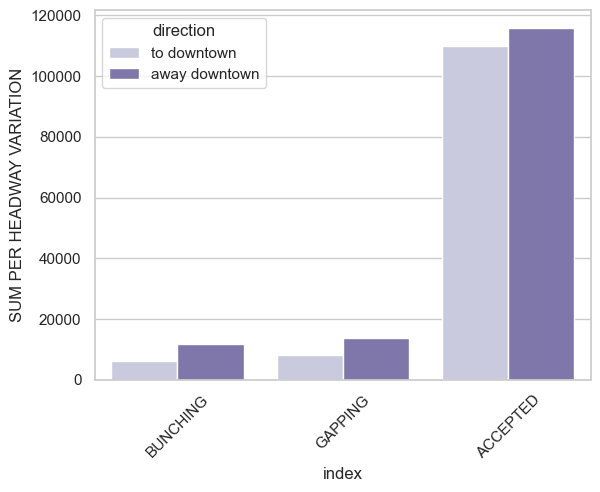

In [117]:
# add column to each data frame identfiying as to or away from downtown
to_dt_hdway_comp['direction'] = 'to downtown'
away_dt_hdway_comp['direction'] = 'away downtown'

#concat the data frames together
direction_headway = pd.concat([to_dt_hdway_comp , away_dt_hdway_comp])

#plot both into a barplot
direction_headway_plt = sns.barplot(x='index', y='SUM PER HEADWAY VARIATION', hue='direction', data=direction_headway, palette = "Purples")

direction_headway_plt.set_xticklabels(direction_headway_plt.get_xticklabels(), rotation=45)

#### investigation of route with headway

In [ ]:
#grouping by route and direction in and summing bunch, gap, and accepted values for distribution

route_headway = wego[["ROUTE_DIRECTION_NAME", "ROUTE_ABBR", "BUNCHING", "GAPPING", "ACCEPTED"]].groupby(['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME']).agg('sum')
#"BUNCHING", "GAPPING", "ACCEPTED")

route_headway


In [ ]:
route_headway['ROUTE_ABBR'] = route_headway.index
route_headway

In [ ]:
# creat visualization for bunching per route

sns.set_theme(style="whitegrid")

#hd_dev = sns.load_dataset('routedir_headway')

g = sns.catplot(
    data=route_headway, kind="bar",
    x="BUNCHING", y="ROUTE_ABBR", #hue="ROUTE_DIRECTION_NAME",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Count Bunching", "Route, Direction")
g.legend.set_title("Bunching vs. Route")

In [ ]:
# create visualization for gapping per route

sns.set_theme(style="whitegrid")

#hd_dev = sns.load_dataset('routedir_headway')

g = sns.catplot(
    data=route_headway, kind="bar",
    x="GAPPING", y="ROUTE_ABBR", #hue="ROUTE_DIRECTION_NAME",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Count Gapping", "Route, Direction")
g.legend.set_title("Gapping vs. Route")

In [ ]:
# create visualization for accepted per route

sns.set_theme(style="whitegrid")

#hd_dev = sns.load_dataset('routedir_headway')

g = sns.catplot(
    data=route_headway, kind="bar",
    x="ACCEPTED", y="ROUTE_ABBR", #hue="ROUTE_DIRECTION_NAME",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Count Accepted", "Route, Direction")
g.legend.set_title("Accepted vs. Route")

# Q3

### How does time of day or day of week affect headway and on-time performance?

In [ ]:
wego.info()

In [ ]:
#convert scheduled time from object to datetime

wego['SCHEDULED_TIME'] = pd.to_datetime(wego['SCHEDULED_TIME'])

In [ ]:
wego.info()

In [ ]:
wego['SCHEDULED_TIME'].dt.weekday.value_counts()

In [ ]:
#create column for day of the week using scheduled time column

wego['DAY_OF_WEEK'] = wego['SCHEDULED_TIME'].dt.day_name()

In [ ]:
wego

In [ ]:
#wego[['DATE','SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME', 'ADHERENCE']]

In [ ]:
#looking at average adherence and hdwy_dev by day

dweek_adhdwy = wego[['DAY_OF_WEEK' , "HDWY_DEV", "ADHERENCE"]].groupby(['DAY_OF_WEEK']).mean("HDWY_DEV", "ADHERENCE")

dweek_adhdwy

In [ ]:
#bunchimg, gapping, accepted summation by day

dweek_hdwy = wego[['DAY_OF_WEEK', "BUNCHING", "GAPPING", "ACCEPTED"]].groupby(['DAY_OF_WEEK']).agg('sum')

dweek_hdwy

In [ ]:
#adherence variances summation based on day of week

dweek_adherence = wego[['DAY_OF_WEEK', "ADJUSTED_EARLY_COUNT", "ADJUSTED_LATE_COUNT", "ADJUSTED_ONTIME_COUNT"]].groupby(['DAY_OF_WEEK']).agg('sum')

dweek_adherence

# Q4

### How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.

In [ ]:
#pd.set_option('display.max_rows', None)

In [ ]:
wego['OPERATOR'].value_counts()

In [ ]:
#wego['OPERATOR_COUNT'] = wego.groupby(['OPERATOR']).transform('count')


In [ ]:
#operator_count_1000 = operator_count[operator_count['OPERATOR_COUNT']> 999]

#operator_count_1000

In [ ]:
operatordf = wego[['ACCEPTED','OPERATOR', 'ADJUSTED_ONTIME_COUNT']].groupby(['OPERATOR']).mean('ACCEPTED','ADJUSTED_ONTIME_COUNT')

operatordf

In [ ]:
sns.relplot(data=operatordf, y="ACCEPTED", x="ADJUSTED_ONTIME_COUNT" , hue='OPERATOR')

In [ ]:
#operator_adherence_late = wego[['OPERATOR', "ADJUSTED_LATE_COUNT"]].groupby(['OPERATOR']).agg('sum')

#operator_adherence_late

In [ ]:
#operator_adherence_early = wego[['OPERATOR', "ADJUSTED_EARLY_COUNT"]].groupby(['OPERATOR']).agg('sum')

#operator_adherence_early

# Q5 

### Is there any relationship between lateness (ADHERENCE) and headway deviation?